In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

CODE_DIR = os.path.abspath(os.path.join(os.getcwd(), "../../"))
os.chdir(CODE_DIR)
os.getcwd()

'/Users/gabrieldiasmp/Documents/pasta_gabriel/codigo/double_ml_labor_market'

# Load data

In [16]:
dml_results = pd.read_excel("data/CONSOLIDATED_results_angrist_dml_noinstitutions.xlsx")
rmse_results = pd.read_excel("data/learners_rmse.xlsx")

# Simulation results

In [33]:
simulation_results = pd.read_excel("data/results_simulation_controls_and_instruments_MERGE.xlsx")

simulation_results['model_name'] = simulation_results['model_name'].replace({
    'First Differences': 'First Differences 2SLS',
    'DML: XGBoost': 'DML: Boosting'
})

In [34]:
simulation_results

,Coefficient,Bias,Standard Error,t-Statistic,p-Value,95% CI Lower,95% CI Upper,model_name,size_panel,simulation
0,0.7954,0.2954,0.0632,12.578200,0.000000e+00,0.6715,0.9193,Pooled 2SLS,15,1
1,0.9756,0.4756,0.0339,28.747429,0.000000e+00,0.9091,1.0421,Pooled 2SLS,50,1
2,0.8716,0.3716,0.0258,33.814775,0.000000e+00,0.8211,0.9221,Pooled 2SLS,100,1
3,0.8888,0.3888,0.0190,46.819670,0.000000e+00,0.8516,0.9260,Pooled 2SLS,200,1
4,0.6733,0.1733,0.0551,12.210876,0.000000e+00,0.5653,0.7814,First Differences 2SLS,15,1
...,...,...,...,...,...,...,...,...,...,...
595,0.5399,0.0399,0.0383,14.099629,3.817729e-45,0.4649,0.6150,DML: Random Forests,200,30
596,0.7366,0.2366,0.0784,9.390829,5.952973e-21,0.5829,0.8903,DML: LASSO,15,30
597,0.3964,-0.1036,0.0861,4.604780,4.129023e-06,0.2277,0.5651,DML: LASSO,50,30
598,0.5897,0.0897,0.0509,11.576771,5.404342e-31,0.4899,0.6896,DML: LASSO,100,30


/var/folders/_q/2vy34m9j2dx56pxmrs4dfp_80000gn/T/ipykernel_11620/268574205.py:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.boxplot(x='model_name', y='Bias', hue='size_panel', data=simulation_results, palette=palette)


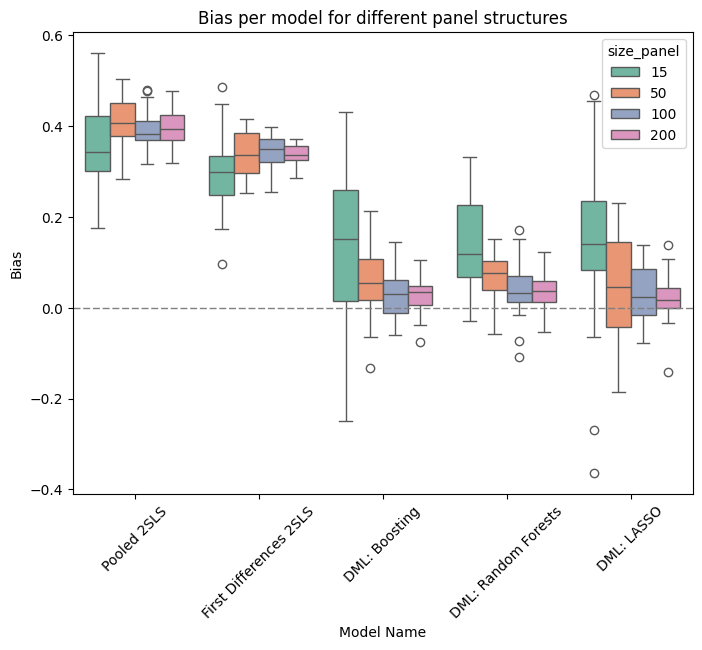

In [36]:
palette = sns.color_palette("Set2")

# Create the boxplot
plt.figure(figsize=(8, 6))  # You can adjust the size
sns.boxplot(x='model_name', y='Bias', hue='size_panel', data=simulation_results, palette=palette)

# Add a smoother dashed line at y=0 with custom dash pattern
line = plt.axhline(0, color='grey', linewidth=1)
line.set_dashes([5, 2])

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add titles and labels
plt.title('Bias per model for different panel structures')
plt.xlabel('Model Name')
plt.ylabel('Bias')

# Show the plot
plt.show()

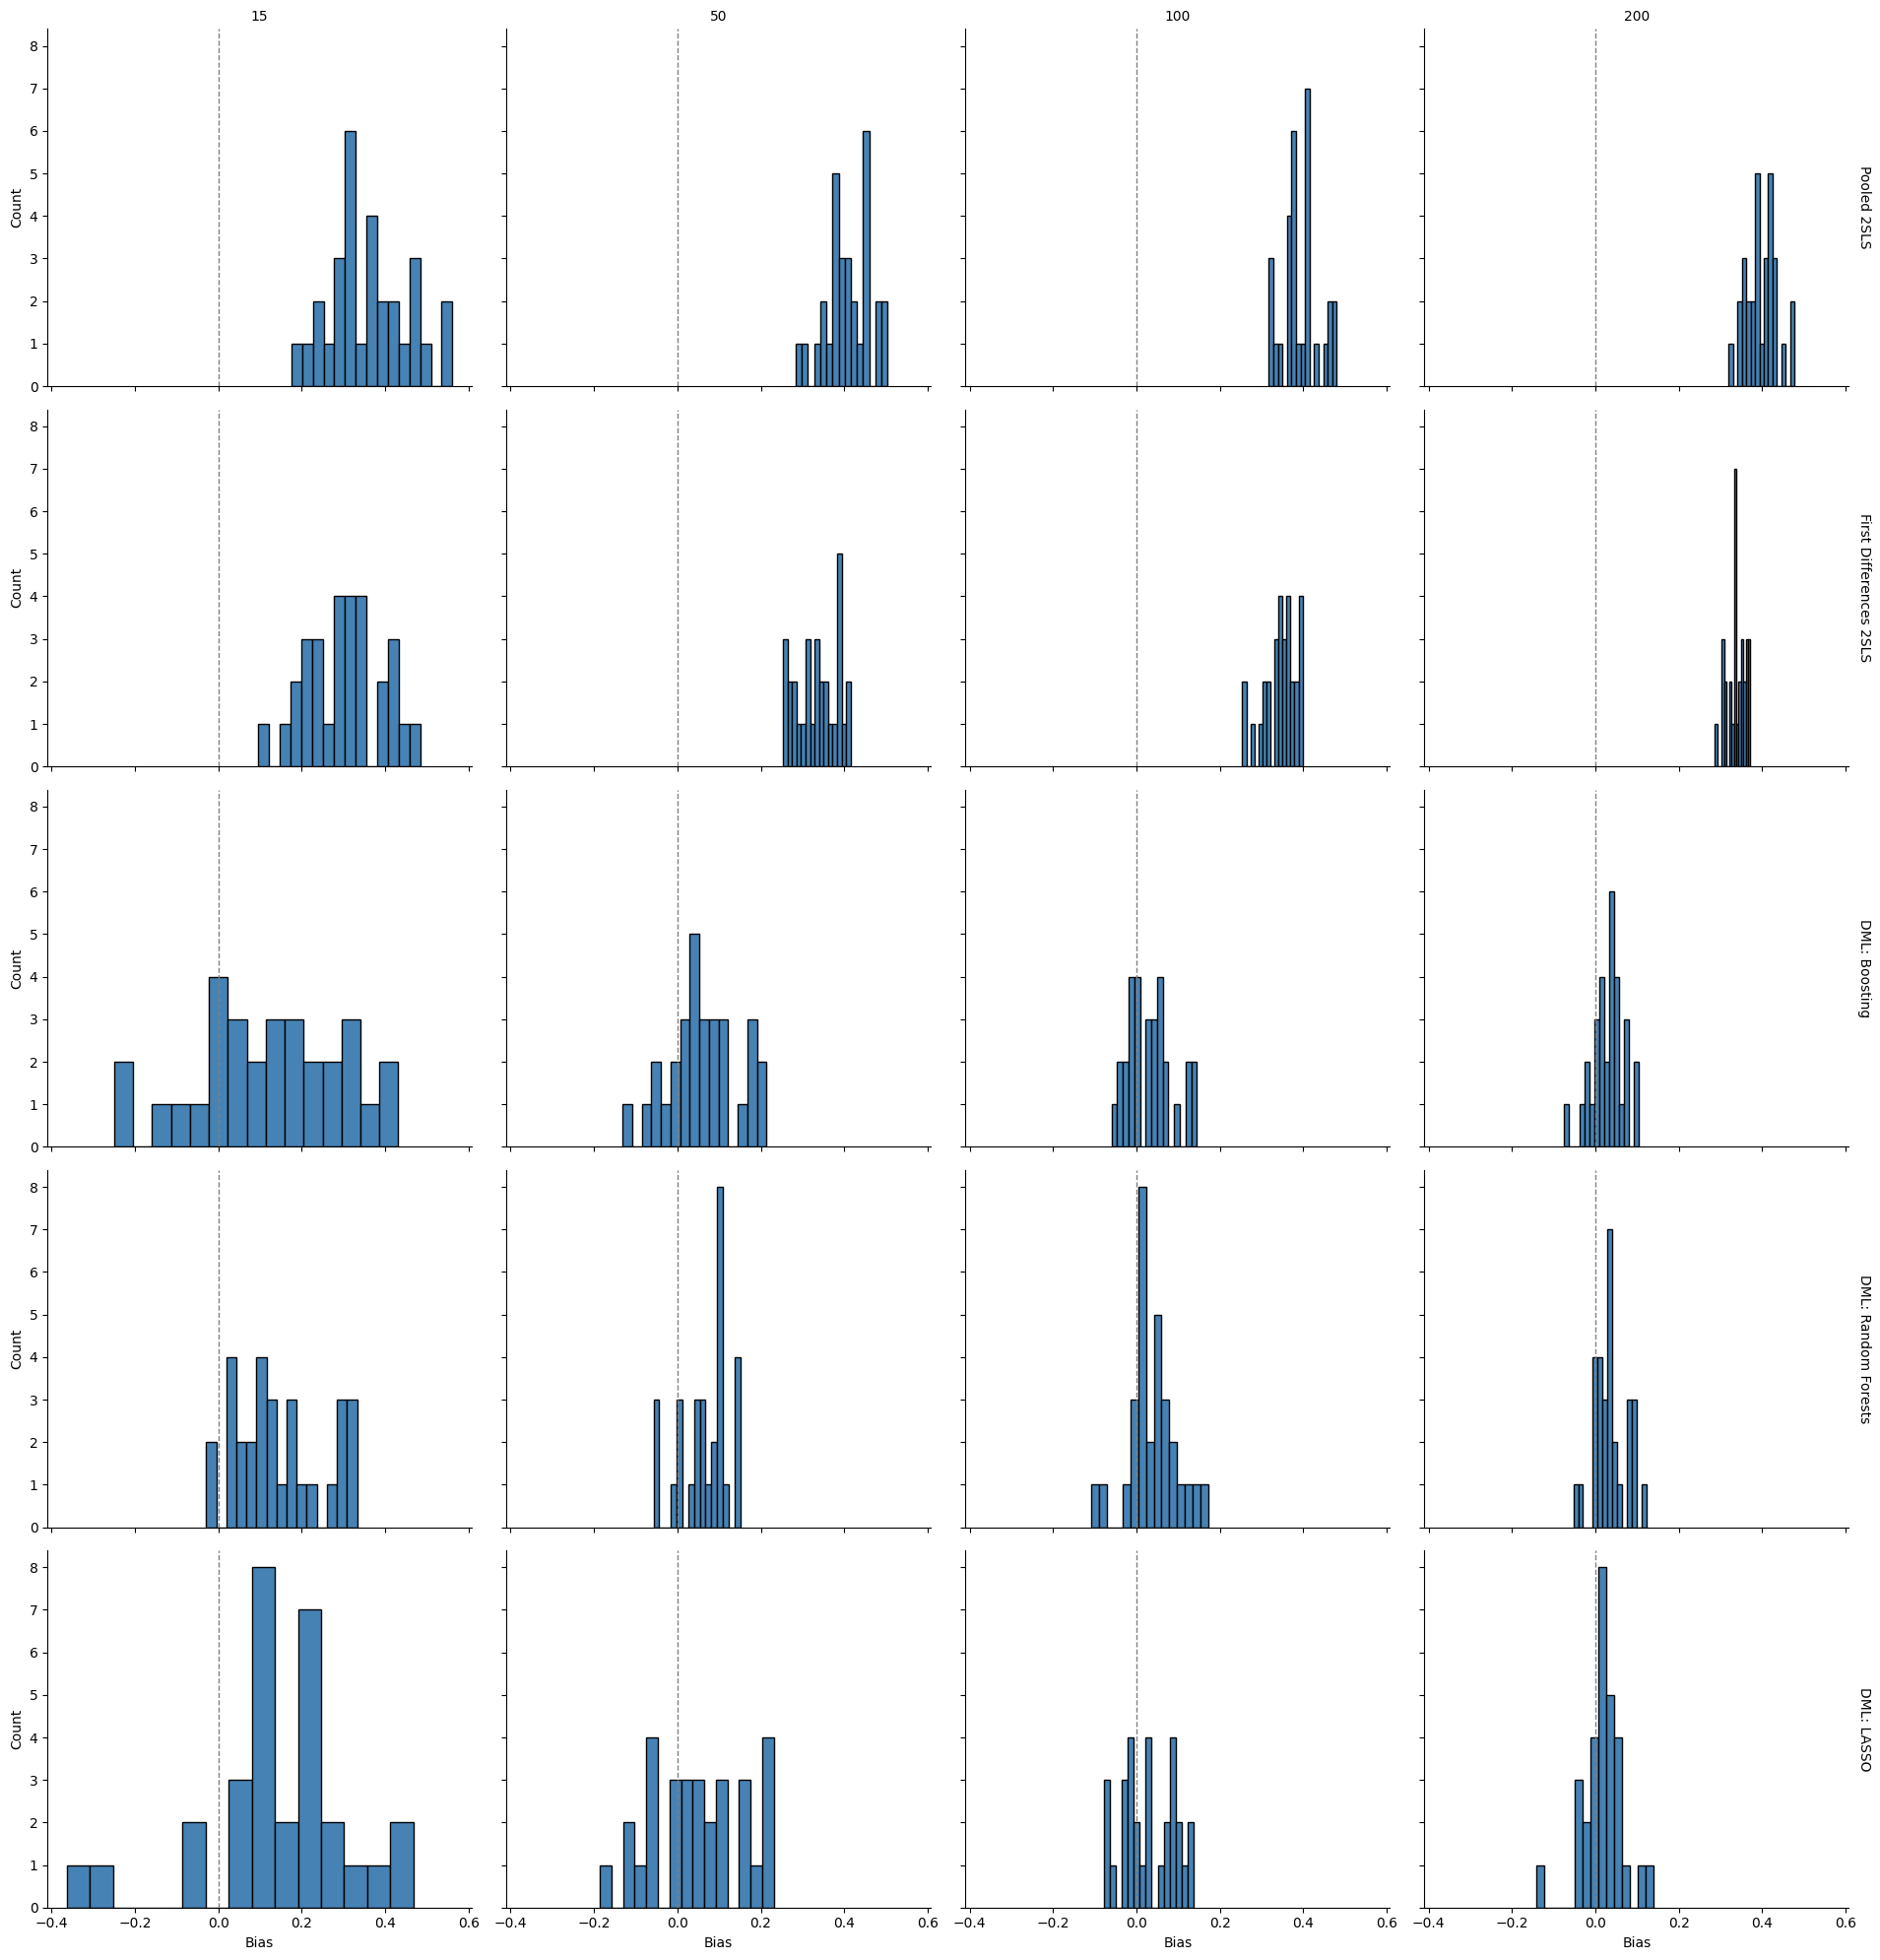

In [39]:
# Create a FacetGrid with model_name and size_panel as row and column categories
g = sns.FacetGrid(simulation_results, row='model_name', col='size_panel', margin_titles=True, height=4, aspect=1.2)

# Map the bias column to create histograms
g.map(plt.hist, 'Bias', bins=15, color='steelblue', edgecolor='black')

# Add a dashed line at x=0 for each subplot
for ax in g.axes.flat:
    ax.axvline(0, color='grey', linestyle='--', linewidth=1)

# Set the axis labels and titles
g.set_axis_labels('Bias', 'Count')
g.set_titles(col_template='{col_name}', row_template='{row_name}')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

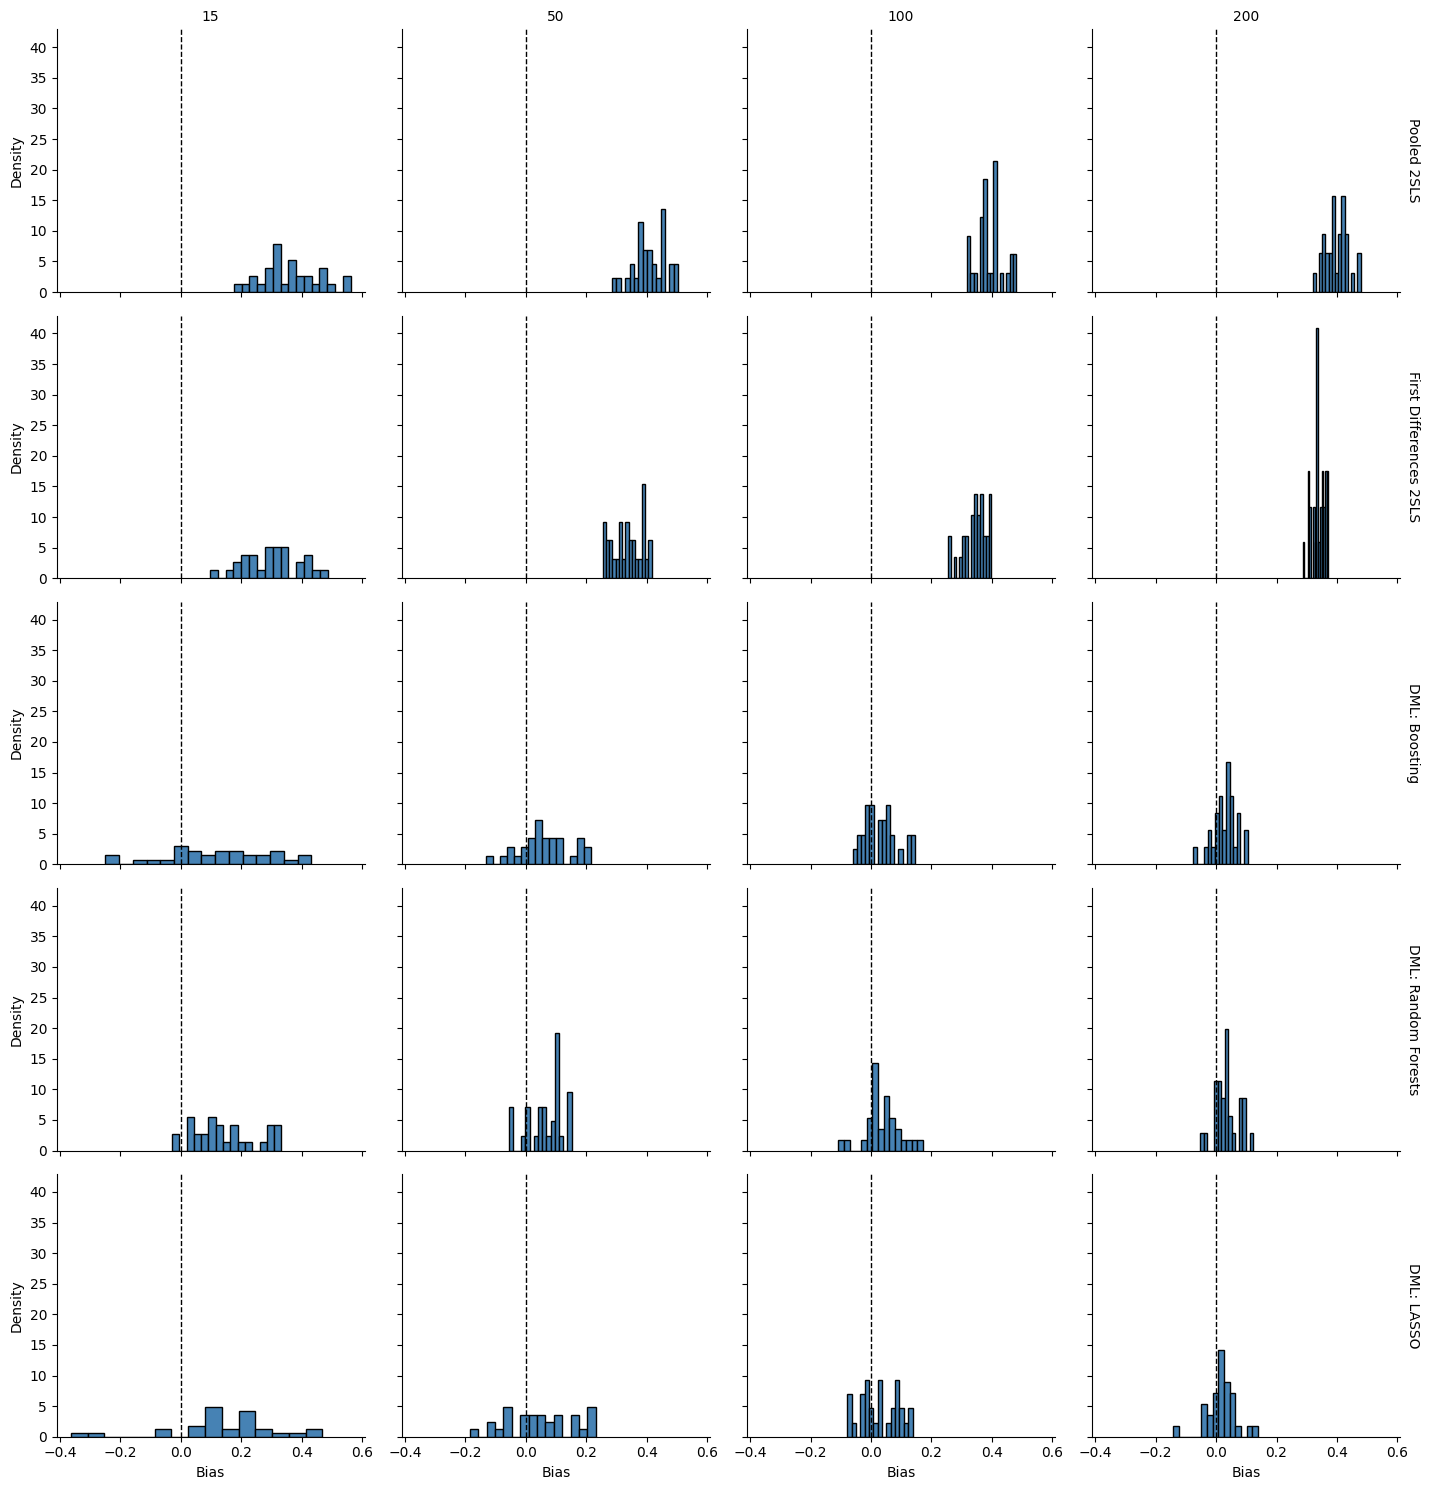

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with model_name and size_panel as row and column categories
g = sns.FacetGrid(simulation_results, row='model_name', col='size_panel', margin_titles=True, height=3, aspect=1.2)

# Map the bias column to create proportional histograms
g.map(plt.hist, 'Bias', bins=15, color='steelblue', edgecolor='black', density=True)

# Add a dashed line at x=0 for each subplot
for ax in g.axes.flat:
    ax.axvline(0, color='black', linestyle='--', linewidth=1)

# Set the axis labels and titles
g.set_axis_labels('Bias', 'Density')
g.set_titles(col_template='{col_name}', row_template='{row_name}')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

# Empirical analysis results

- Without institutions

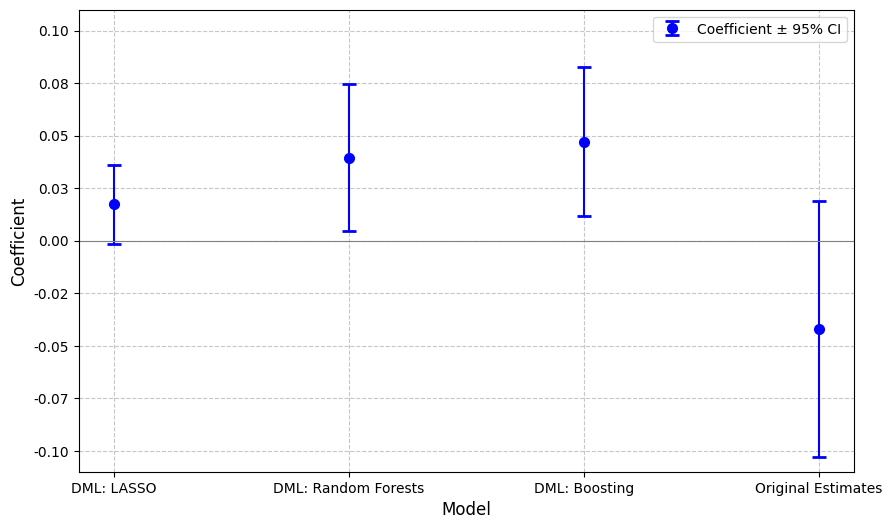

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
models = ["DML: LASSO", "DML: Random Forests", "DML: Boosting", "Original Estimates"]
coefficients = [0.0173, 0.0395, 0.0472, -0.042]
ci_lower = [-0.0015, 0.0046, 0.012, -0.10276]
ci_upper = [0.0361, 0.0744, 0.0825, 0.01876]

# Calculate errors for the confidence intervals
errors = [ [coeff - lower, upper - coeff] for coeff, lower, upper in zip(coefficients, ci_lower, ci_upper)]
errors_lower, errors_upper = zip(*errors)

# Plot the coefficients with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(models, coefficients, yerr=[errors_lower, errors_upper], fmt='o', color='blue', capsize=5, capthick=2, markeredgewidth=2, label='Coefficient ± 95% CI')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Coefficient', fontsize=12)
plt.xticks(ticks=range(len(models)), labels=models, rotation=0, fontsize=10, ha='center')

# Adjust y-axis to show two decimal places
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))


plt.ylim(-0.11, 0.11)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
#plt.title('Coefficients and 95% Confidence Intervals by Model')
plt.show()


- With institutions

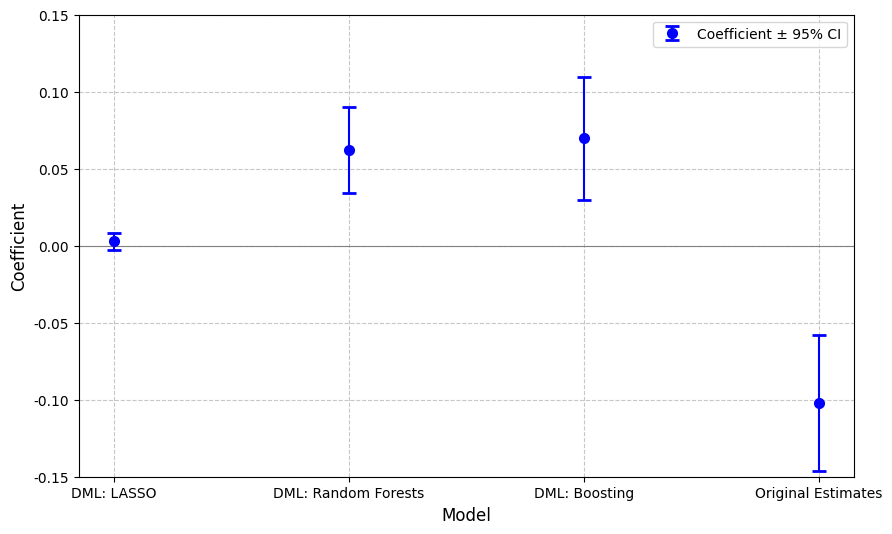

In [11]:
# Updated data from the table
models = ["DML: LASSO", "DML: Random Forests", "DML: Boosting", "Original Estimates"]
coefficients = [0.0028, 0.0621, 0.0697, -0.102]
ci_lower = [-0.00255, 0.0342, 0.0299, -0.1460]
ci_upper = [0.0082, 0.0900, 0.1095, -0.0582]

# Calculate errors for the confidence intervals
errors = [[coeff - lower, upper - coeff] for coeff, lower, upper in zip(coefficients, ci_lower, ci_upper)]
errors_lower, errors_upper = zip(*errors)

# Plot the coefficients with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(models, coefficients, yerr=[errors_lower, errors_upper], fmt='o', color='blue', capsize=5, capthick=2, markeredgewidth=2, label='Coefficient ± 95% CI')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Coefficient', fontsize=12)
plt.xticks(ticks=range(len(models)), labels=models, rotation=0, fontsize=10, ha='center')

# Adjust y-axis to show two decimal places
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Update y-axis limits to reflect new coefficient range
plt.ylim(-0.15, 0.15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
#plt.title('Coefficients and 95% Confidence Intervals by Model')
plt.show()

## RMSE results

In [17]:
rmse_results

,rmse_g(x),rmse_m(x),model
0,0.037535,0.984422,DML: LASSO
1,0.047948,0.740246,DML: XGBoost
2,0.048934,0.678959,DML: Random Forests
3,0.035899,3.495693,DML: LASSO
4,0.048370,0.770436,DML: XGBoost
...,...,...,...
295,0.047918,0.710214,DML: XGBoost
296,0.053853,0.659906,DML: Random Forests
297,0.035309,0.973352,DML: LASSO
298,0.053316,0.765809,DML: XGBoost


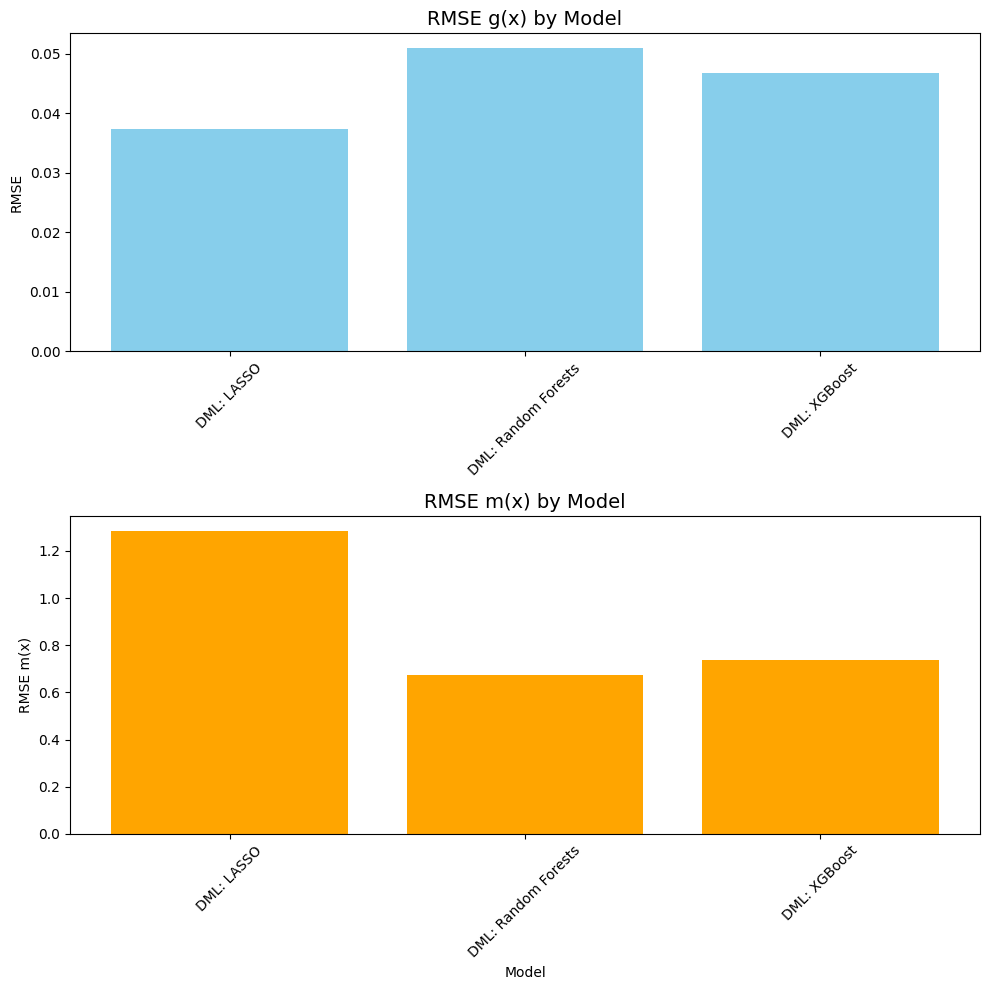

In [5]:
# Group by model and calculate the mean for both rmse_g(x) and rmse_m(x)
df_mean = rmse_results.groupby('model').mean().reset_index()

# Create the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot for rmse_g(x)
axes[0].bar(df_mean['model'], df_mean['rmse_g(x)'], color='skyblue')
axes[0].set_title('RMSE g(x) by Model', fontsize=14)
axes[0].set_ylabel('RMSE')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)

# Plot for rmse_m(x)
axes[1].bar(df_mean['model'], df_mean['rmse_m(x)'], color='orange')
axes[1].set_title('RMSE m(x) by Model', fontsize=14)
axes[1].set_ylabel('RMSE m(x)')
axes[1].set_xlabel('Model')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()

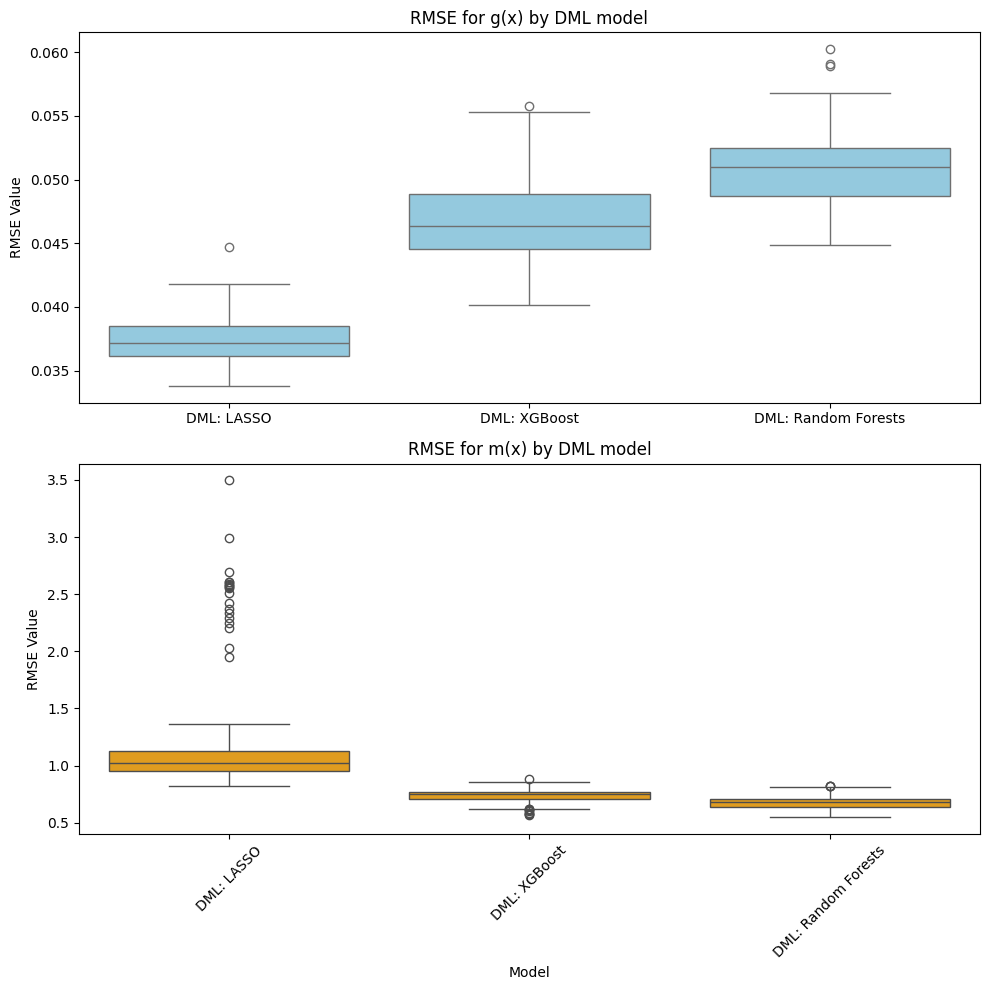

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Boxplot for g(x)
sns.boxplot(x="model", y="rmse_g(x)", data=rmse_results, ax=axes[0], color="skyblue")
axes[0].set_title('RMSE for g(x) by DML model')
axes[0].set_xlabel('')
axes[0].set_ylabel('RMSE Value')

# Boxplot for m(x)
sns.boxplot(x="model", y="rmse_m(x)", data=rmse_results, ax=axes[1], color="orange")
axes[1].set_title('RMSE for m(x) by DML model')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('RMSE Value')

# Rotate x-ticks for both plots
plt.xticks(rotation=45)

# Tight layout to adjust spacing
plt.tight_layout()

# Show the plots
plt.show()

## For DML coefficients

In [12]:
dml_results

,Coefficient,Bias,Standard Error,t-Statistic,p-Value,95% CI Lower,95% CI Upper,model_name,size_panel,simulation
0,0.0051,0.0051,0.0065,0.783732,0.433197,-0.0076,0.0178,DML: LASSO,17,1
1,0.0379,0.0379,0.0214,1.767093,0.077213,-0.0041,0.0799,DML: XGBoost,17,1
2,0.0378,0.0378,0.0177,2.129048,0.033250,0.0030,0.0726,DML: Random Forests,17,1
3,0.0021,0.0021,0.0010,2.154592,0.031194,0.0002,0.0040,DML: LASSO,17,2
4,0.0154,0.0154,0.0203,0.757659,0.448655,-0.0244,0.0552,DML: XGBoost,17,2
...,...,...,...,...,...,...,...,...,...,...
295,0.0432,0.0432,0.0214,2.022961,0.043077,0.0013,0.0851,DML: XGBoost,17,99
296,0.0438,0.0438,0.0188,2.326116,0.020012,0.0069,0.0806,DML: Random Forests,17,99
297,0.0192,0.0192,0.0076,2.534678,0.011255,0.0044,0.0341,DML: LASSO,17,100
298,0.0105,0.0105,0.0216,0.485701,0.627179,-0.0318,0.0528,DML: XGBoost,17,100


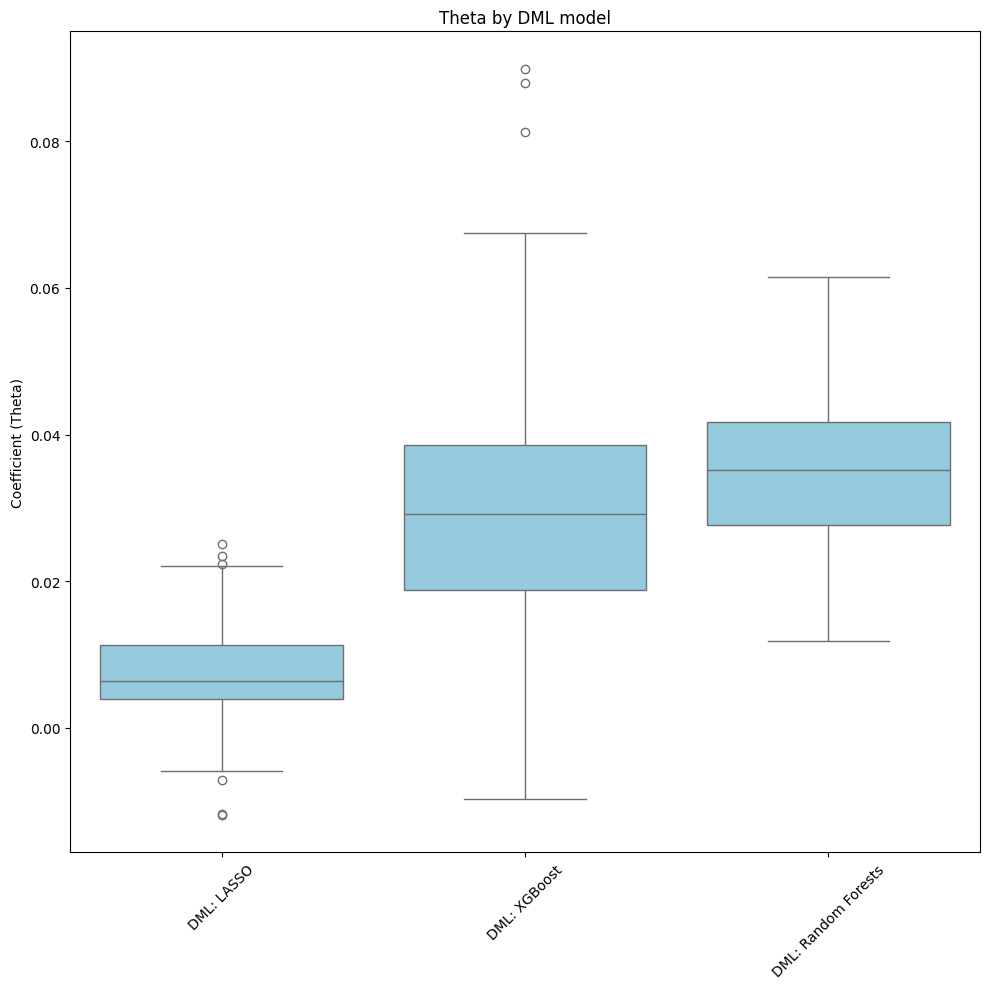

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

# Boxplot for g(x)
sns.boxplot(x="model_name", y="Coefficient", data=dml_results, ax=axes, color="skyblue")
axes.set_title('Theta by DML model')
axes.set_xlabel('')
axes.set_ylabel('Coefficient (Theta)')

# Rotate x-ticks for the plot
plt.xticks(rotation=45)

# Tight layout to adjust spacing
plt.tight_layout()

# Descriptive statistics

In [18]:
descriptive_statistics = pd.read_excel("/Users/gabrieldiasmp/Documents/pasta_gabriel/codigo/double_ml_labor_market/data/descriptive_statistics.xlsx")

In [19]:
descriptive_statistics

,Unnamed: 0,employment,Unnamed: 2,Unnamed: 3,non_eu_immigrant_share,Unnamed: 5,Unnamed: 6,eu_immigrant_share,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,emp_prot,Unnamed: 14,Unnamed: 15,lab_stan,Unnamed: 17,Unnamed: 18,rep_rate,Unnamed: 20,Unnamed: 21
0,NaN,count,mean,std,count,mean,std,count,mean,std,...,std,count,mean,std,count,mean,std,count,mean,std
1,country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AT,5,0.864532,0.009033,5,0.084763,0.002386,5,0.012969,0.001595,...,18.813131,5,3,0,5,0,0,5,-0.734156,0
3,BE,17,0.829087,0.013643,17,0.022687,0.002385,17,0.055638,0.003254,...,107.679253,17,4,0,17,-0.512348,0,17,-0.169421,0
4,CH,4,0.911258,0.013776,4,0.055766,0.002255,4,0.169521,0.006264,...,10.609241,4,-7,0,4,-1.024695,0,4,0.395315,0
5,DE,16,0.841486,0.010955,16,0.053985,0.005782,16,0.030066,0.002972,...,5794.692383,16,2,0,16,0.512348,0,16,0,0
6,DK,17,0.854004,0.026332,17,0.012241,0.002658,17,0.008474,0.000815,...,101.504135,17,-8,0,17,-1.537043,0,17,1.524785,0
7,ES,13,0.709452,0.03838,13,0.003795,0.002308,13,0.002451,0.000872,...,676.173889,13,6,0,13,1.024695,0.0,13,0.395315,0.0
8,FI,2,0.759024,0.067393,2,0.00866,0.003204,2,0.001461,0.000115,...,48.009544,2,-3,0,2,0,0,2,0,0
9,FR,17,0.825336,0.03947,17,0.036467,0.001723,17,0.027813,0.003577,...,1101.764771,17,1,0,17,0.512348,0,17,-0.338841,0
